# Project 1 

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy
import turbo
from mpl_toolkits.mplot3d import Axes3D  # NOQA: F401 unused import
from resources import franke
from statistics import linear_regression
import statistics

<IPython.core.display.Javascript object>


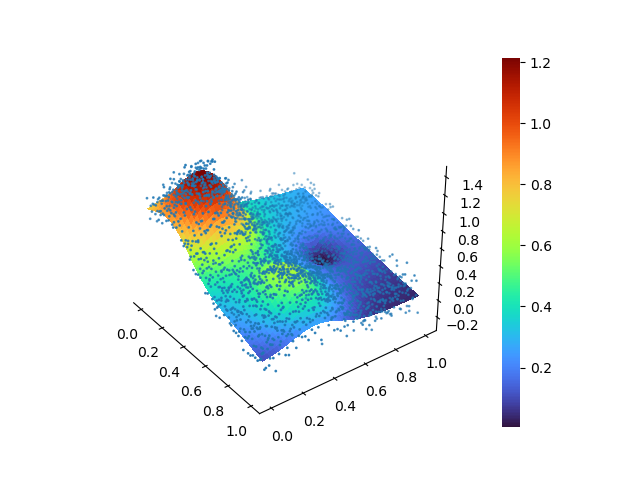

In [54]:
# Truth
x = np.linspace(0, 1)
y = np.linspace(0, 1)
X_true, Y_true = np.meshgrid(x, y)
Z_true = franke(X_true, Y_true)

# Noisy data
x_noise = np.linspace(0, 1, 50)
y_noise = np.linspace(0, 1, 50)
X_noise, Y_noise = np.meshgrid(x, y)
Z_noise = franke(X_noise, Y_noise)
Z_noise += np.random.normal(0, 0.1, Z_noise.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X_true, Y_true, Z_true, cmap='turbo', antialiased=False, linewidth=0)
ax.scatter(X_noise, Y_noise, Z_noise, s=1)
remove_panes(ax)
cb = fig.colorbar(surface)
cb.outline.set_linewidth(0)

## Performing linear regression

The Franke function is a function of two variables, so we need to use a bit more complicated regression. The Vandermonde should contain $n + m + 1$ variables where the constants are combined into one, or more generally $1+\Sigma_{i=1}^{i\le k}n_i$ for $k$ variables of order $n_i$. 

<IPython.core.display.Javascript object>


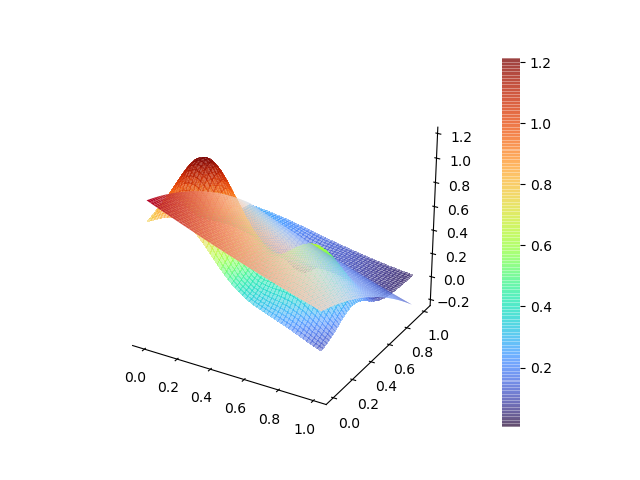

0.6436030131401362
83.25633096277387


In [60]:
fitter = statistics.Regressor([X_noise, Y_noise], Z_noise)
fitter.fit([2, 2])
ẑ = fitter.predict([X_noise, Y_noise])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(X_true, Y_true, Z_true, cmap='turbo', 
                          antialiased=False, linewidth=0, alpha=0.5)
ax.plot_surface(X_noise, Y_noise, ẑ, cmap='coolwarm')
remove_panes(ax)
cb = fig.colorbar(surface)
cb.outline.set_linewidth(0)

print(fitter.r2())
print(fitter.MSE())

## Todo

- [ ] Show how bias-variance changes as the order changes for many ensembles.
- [ ] Make confidence intervals.
- [ ] Implement k-fold cross validation.
- [ ] Implement Lasso and Ridge regression by subclassing.
- [ ] Look at how the geo-data is structured.
- [ ] Write tests

## Testing of the code

<IPython.core.display.Javascript object>


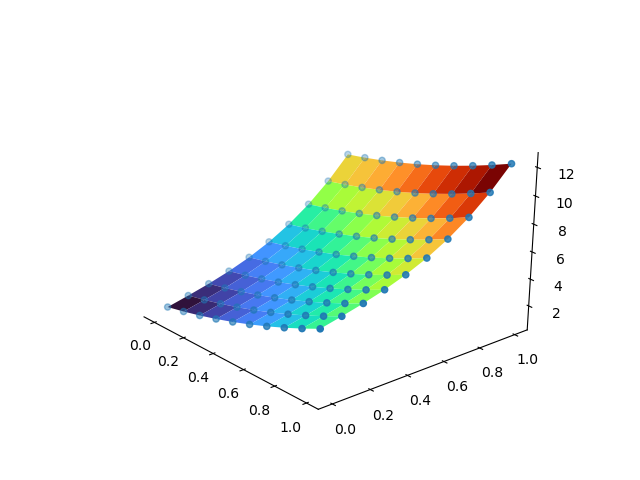

In [52]:
x, y = np.linspace(0, 1, 10), np.linspace(0, 1, 10)
X, Y = np.meshgrid(x, y)
f = lambda x, y: 1 + 2.5*x + 1.7*x**2 + 3* y + 4*y**3
Z = f(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='turbo')
remove_panes(ax)

reg = statistics.Regressor([X, Y], Z)
reg.fit([3, 3])
Ẑ = reg.predict([X, Y])
ax.scatter(X, Y, Ẑ)

In [51]:
def remove_panes(ax):
    # make the panes transparent
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # make the grid lines transparent
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)